In [61]:
import os
from pathlib import Path
from typing import List
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import plotly.graph_objects as go
from IPython.display import clear_output

fixed_palette = {
    'gray': 'xkcd:gray',
    'green': 'xkcd:shamrock green',
    'red': 'xkcd:light red',
    'blue': 'xkcd:blue',
}
markertypes = ['X', 'D', 'o', 'P']
labels = ['GenGamma', 'Laplace', 'Gaussian', 'Student t']
points = [Line2D([0], [0], color='k', linestyle='', marker=m, markersize=5) for m in markertypes]

def find_master_dfs(root_dir: str) -> List[str]:
    root_path = Path(root_dir)
    if not root_path.exists():
        raise FileNotFoundError(f"Directory not found: {root_dir}")

    master_df_paths = []
    for current_dir, _, files in os.walk(root_path):
        if 'master_df.csv' in files:
            master_df_path = Path(os.path.join(current_dir, 'master_df.csv'))
            master_df_paths.append(str(master_df_path.absolute()))
    return master_df_paths

relevant_cols = ['group', 'obs_var', 'var_lower', 'var_upper', 'obs_kurt', 'kurt_lower',
       'kurt_upper', 'total_samples', 'initial_r', 'initial_eta',
       'kstest_stat_initial', 'kstest_stat_cutoff_0.05', 'kstest_stat_eta0',
       'best_r_eta0', 'best_r', 'best_eta', 'kstest_stat_best', 'iter1_r',
       'iter1_eta', 'kstest_stat_iter1', 'n_pval_0.05', 'param_gaussian',
       'kstest_stat_gaussian', 'kstest_pval_gaussian', 'param_laplace',
       'kstest_stat_laplace', 'kstest_pval_laplace', 'param_t',
       'kstest_stat_t', 'kstest_pval_t', 'kstest_pval_gengamma', 'dataset', 'transform', 'size', 'channel']

all_paths = find_master_dfs('..\case-studies')
all_master_dfs = []

for path in all_paths:
    dataset, transform, size, channel, _, _ = Path(path).parts[-6:]
    master_df = pd.read_csv(path)
    master_df = master_df.rename(columns={master_df.columns[0]: 'group'})#.set_index('group')
    master_df['dataset'] = dataset
    master_df['transform'] = transform
    master_df['size'] = size
    master_df['channel'] = channel

    all_master_dfs.append(master_df[relevant_cols])
    
main_df = pd.concat(all_master_dfs)

<Axes: xlabel='group', ylabel='kstest_stat_best'>

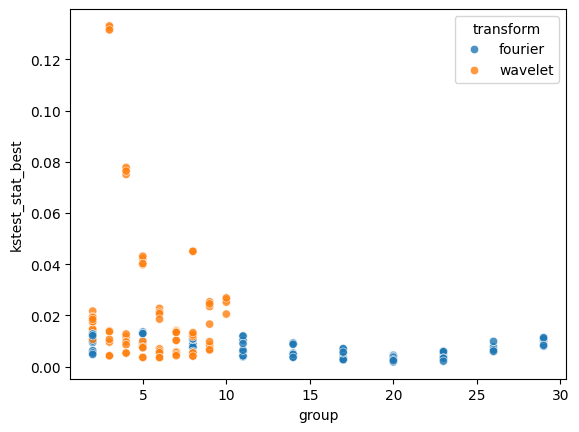

In [62]:
#sns.scatterplot(data=main_df, x='best_r', y='best_eta', hue='transform')
#sns.scatterplot(data=main_df, x='group', y='kstest_stat_best', style='transform', hue='channel', palette = fixed_palette, alpha = 0.8)
sns.scatterplot(data=main_df, x='group', y='kstest_stat_best', hue='transform', alpha = 0.8)

Text(0.5, 1.0, 'spaceNet KS-Test Statistics for Different Priors (by channel)')

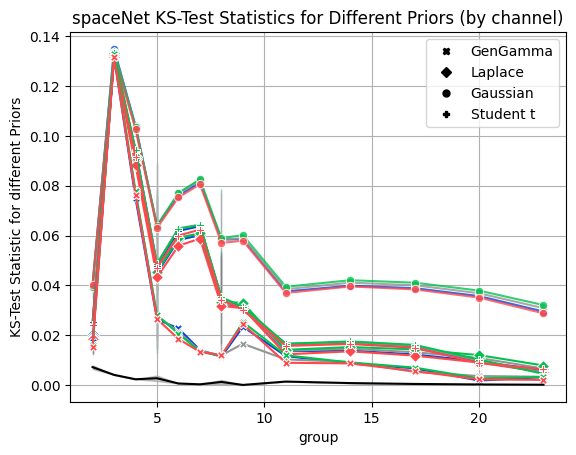

In [ ]:
dataset_name = 'spaceNet'
hue='channel'
temp = main_df[main_df['dataset'] == dataset_name]
# fixed_palette = None
sns.lineplot(data=temp, x='group', y='kstest_stat_gaussian', hue=hue, palette=fixed_palette, marker = 'o', alpha=0.8)
sns.lineplot(data=temp, x='group', y='kstest_stat_laplace', hue=hue, palette=fixed_palette, marker = 'D')
sns.lineplot(data=temp, x='group', y='kstest_stat_t', hue=hue, palette=fixed_palette, marker = 'P')
sns.lineplot(data=temp, x='group', y='kstest_stat_best', hue=hue, palette=fixed_palette, marker = 'X')
sns.lineplot(data=temp, x='group', y='kstest_stat_cutoff_0.05', c = 'black')
plt.ylabel("KS-Test Statistic for different Priors")
plt.legend(points, labels)
plt.grid(True)
plt.title(f"{dataset_name} KS-Test Statistics for Different Priors (by {hue})")

Text(0.5, 1.0, 'agriVision KS-Test Statistics for Different Priors (by channel)')

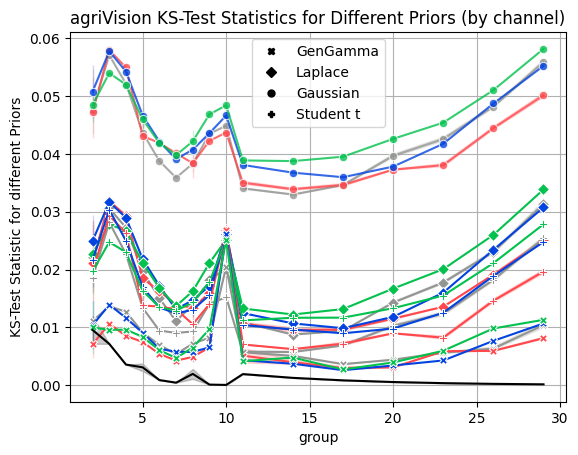

In [64]:
dataset_name = 'agriVision'
hue='channel'
temp = main_df[main_df['dataset'] == dataset_name]
# fixed_palette = None
sns.lineplot(data=temp, x='group', y='kstest_stat_gaussian', hue=hue, palette=fixed_palette, marker = 'o', alpha=0.8)
sns.lineplot(data=temp, x='group', y='kstest_stat_laplace', hue=hue, palette=fixed_palette, marker = 'D')
sns.lineplot(data=temp, x='group', y='kstest_stat_t', hue=hue, palette=fixed_palette, marker = 'P')
sns.lineplot(data=temp, x='group', y='kstest_stat_best', hue=hue, palette=fixed_palette, marker = 'X')
sns.lineplot(data=temp, x='group', y='kstest_stat_cutoff_0.05', c = 'black')
plt.ylabel("KS-Test Statistic for different Priors")
plt.legend(points, labels)
plt.grid(True)
plt.title(f"{dataset_name} KS-Test Statistics for Different Priors (by {hue})")

In [65]:
y_cols = ['initial_eta', 'kstest_stat_initial', 'kstest_stat_cutoff_0.05', 'kstest_stat_eta0',
'best_r_eta0', 'best_r', 'best_eta', 'kstest_stat_best', 'iter1_r',
'iter1_eta', 'kstest_stat_iter1', 'n_pval_0.05', 'param_gaussian',
'kstest_stat_gaussian', 'kstest_pval_gaussian', 'param_laplace',
'kstest_stat_laplace', 'kstest_pval_laplace', 'param_t',
'kstest_stat_t', 'kstest_pval_t', 'kstest_pval_gengamma']

In [66]:
# Create figure container that will be updated
fig_widget = go.FigureWidget()

# Create the widgets
x_dropdown = widgets.Dropdown(
    options=['initial_r', 'best_r', 'group'],
    value='best_r',
    description='X-axis:'
)

y_dropdown = widgets.Dropdown(
    options=y_cols,
    value='best_eta',
    description='Y-axis:'
)

color_dropdown = widgets.Dropdown(
    options=['None'] + ['dataset','transform', 'size', 'channel'],
    value='channel',
    description='Color:'
)

marker_dropdown = widgets.Dropdown(
    options=['None'] + ['dataset','transform', 'size', 'channel'],
    value='transform',
    description='Marker:'
)

# Create axis limit controls
x_limit = widgets.FloatText(
    value=np.ceil(main_df[x_dropdown.value].max()),
    description='X max:',
    style={'description_width': 'initial'}
)

y_limit = widgets.FloatText(
    value=np.ceil(main_df[y_dropdown.value].max()),
    description='Y max:',
    style={'description_width': 'initial'}
)

# Create filtering controls
filter_column = widgets.Dropdown(
    options=['None'] + ['dataset','transform', 'size', 'channel'],
    value='None',
    description='Filter column:',
    style={'description_width': 'initial'}
)

# Function to update filter value options based on selected column
def update_filter_options(*args):
    if filter_column.value == 'None':
        filter_value.options = ['None']
    else:
        unique_values = main_df[filter_column.value].unique()
        filter_value.options = ['None'] + list(map(str, unique_values))

filter_value = widgets.Dropdown(
    options=['None'],
    value='None',
    description='Filter value:',
    style={'description_width': 'initial'}
)

# Link filter column selection to value options update
filter_column.observe(update_filter_options, 'value')

# Function to create and update the plot
def update_plot(*args):
    # Get current values
    x = x_dropdown.value
    y = y_dropdown.value
    color = color_dropdown.value
    marker = marker_dropdown.value
    x_max = x_limit.value
    y_max = y_limit.value
    filter_col = filter_column.value
    filter_val = filter_value.value

    # Apply filtering
    if filter_col != 'None' and filter_val != 'None':
        col_type = main_df[filter_col].dtype
        if col_type == np.float64 or col_type == np.int64:
            filtered_df = main_df[main_df[filter_col] == float(filter_val)]
        else:
            filtered_df = main_df[main_df[filter_col] == filter_val]
    else:
        filtered_df = main_df.copy()
    
    # Create new figure data
    color_val = None if color == 'None' else color
    symbol_val = None if marker == 'None' else marker
    
    # Create temporary figure to get the correct trace formatting
    temp_fig = px.scatter(filtered_df, 
                         x=x,
                         y=y,
                         color=color_val,
                         symbol=symbol_val)
    
    # Clear existing traces
    fig_widget.data = []
    
    # Add new traces
    for trace in temp_fig.data:
        fig_widget.add_trace(trace)
    
    # Update layout
    fig_widget.update_layout(
        title=f'{y} vs {x}' + (f' (Filtered by {filter_col}={filter_val})' if filter_col != 'None' and filter_val != 'None' else ''),
        title_x=0.5,
        xaxis=dict(title=x, range=[0, x_max]),
        yaxis=dict(title=y, range=[0, y_max]),
        height=600,
        width=800,
        margin=dict(l=20, r=20, t=40, b=20)
    )

# Function to update axis limit defaults when axis selection changes
def update_x_limit(*args):
    x_limit.value = float(main_df[x_dropdown.value].max())

def update_y_limit(*args):
    y_limit.value = float(main_df[y_dropdown.value].max())

# Set up all observers
x_dropdown.observe(update_plot, 'value')
y_dropdown.observe(update_plot, 'value')
color_dropdown.observe(update_plot, 'value')
marker_dropdown.observe(update_plot, 'value')
x_limit.observe(update_plot, 'value')
y_limit.observe(update_plot, 'value')
filter_column.observe(update_plot, 'value')
filter_value.observe(update_plot, 'value')
x_dropdown.observe(update_x_limit, 'value')
y_dropdown.observe(update_y_limit, 'value')

# Organize controls in a more structured layout
axis_controls = widgets.VBox([
    widgets.HBox([x_dropdown, x_limit]),
    widgets.HBox([y_dropdown, y_limit])
])

style_controls = widgets.VBox([
    color_dropdown,
    marker_dropdown
])

filter_controls = widgets.VBox([
    filter_column,
    filter_value
])

# Create tabs for different control groups
tab = widgets.Tab()
tab.children = [axis_controls, style_controls, filter_controls]
tab.set_title(0, 'Axes')
tab.set_title(1, 'Style')
tab.set_title(2, 'Filter')

# Initialize the plot
update_plot()

# Display everything
display(tab, fig_widget)

FigureWidget({
    'data': [{'hovertemplate': 'channel=gray<br>transform=fourier<br>best_r=%{x}<br>best_eta=%{y}<extra></extra>',
              'legendgroup': 'gray, fourier',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'gray, fourier',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'e4e63169-286e-41d1-8fb3-8d8bb26d0e08',
              'x': array([0.1611, 0.1612, 0.1788, 0.1879, 0.1989, 0.1977, 0.1923, 0.1977, 0.2016,
                          0.2191, 0.169 , 0.162 , 0.171 , 0.188 , 0.198 , 0.198 , 0.192 , 0.198 ,
                          0.201 , 0.218 , 0.159 , 0.159 , 0.17  , 0.168 , 0.18  , 0.19  , 0.227 ,
                          0.257 ]),
              'xaxis': 'x',
              'y': array([ 1.057,  0.769,  1.416,  1.646,  1.922,  1.43 ,  0.799,  0.58 ,  0.15 ,
                          -0.228,  1.55 ,  0.79 ,  0.95 ,  1.63 ,  1

## spaceNet fourier

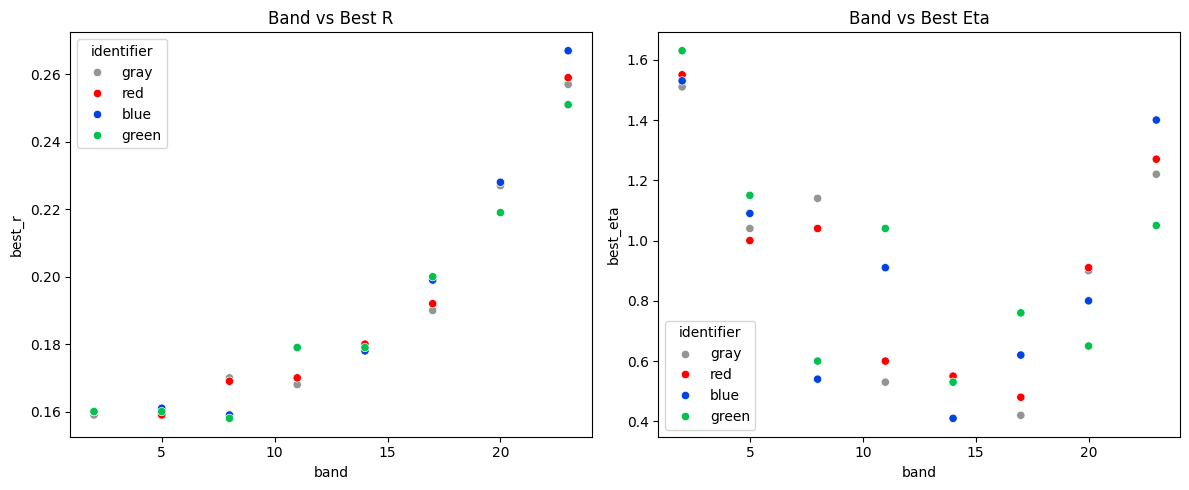

In [ ]:
summary_df = pd.read_csv('spaceNet_fourier_grayredbluegreen_summary_df.csv')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.scatterplot(data=summary_df, x=summary_df.columns[0], y='best_r', hue='identifier', palette=fixed_palette, ax=axes[0])
axes[0].set_title('Band vs Best R')
sns.scatterplot(data=summary_df, x=summary_df.columns[0], y='best_eta', hue='identifier', palette=fixed_palette, ax=axes[1])
axes[1].set_title('Band vs Best Eta')
plt.tight_layout()
plt.show()

<Axes: xlabel='band', ylabel='kstest_stat_best'>

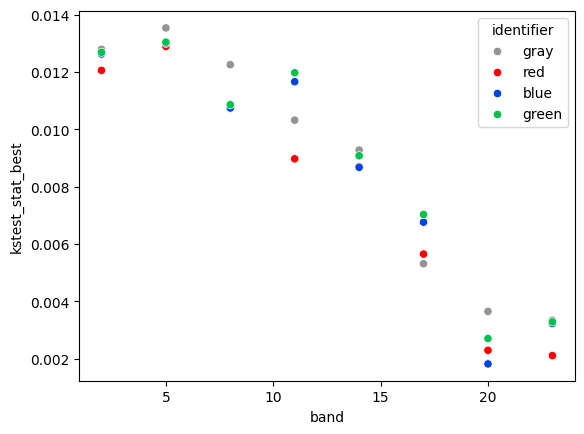

In [ ]:
sns.scatterplot(data=summary_df, x=summary_df.columns[0], y='kstest_stat_best', hue='identifier', palette=fixed_palette)

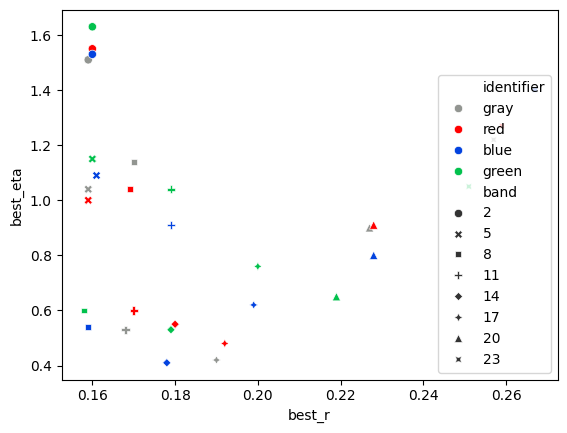

In [ ]:
sns.scatterplot(data=summary_df, x='best_r', y='best_eta', hue='identifier', style='band', palette=fixed_palette)
plt.legend(loc = 'lower right')

Text(0, 0.5, 'Parameters (Gaussian / Laplace)')

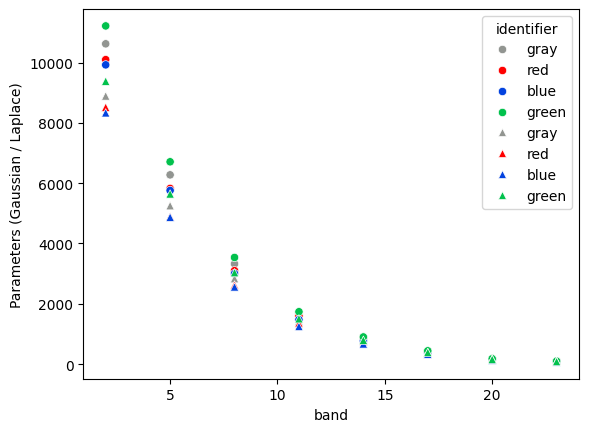

In [ ]:
sns.scatterplot(data=summary_df, x=summary_df.columns[0], y='param_gaussian', hue='identifier', palette=fixed_palette, marker = 'o')
sns.scatterplot(data=summary_df, x=summary_df.columns[0], y='param_laplace', hue='identifier', palette=fixed_palette, marker = '^')
plt.ylabel("Parameters (Gaussian / Laplace)")

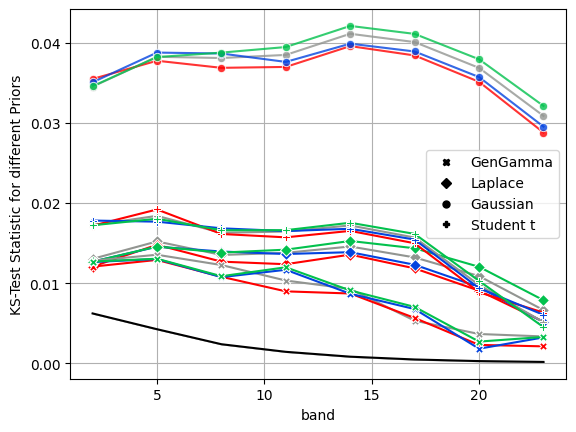

In [ ]:
sns.lineplot(data=summary_df, x=summary_df.columns[0], y='kstest_stat_gaussian', hue='identifier', palette=fixed_palette, marker = 'o', alpha=0.8)
sns.lineplot(data=summary_df, x=summary_df.columns[0], y='kstest_stat_laplace', hue='identifier', palette=fixed_palette, marker = 'D')
sns.lineplot(data=summary_df, x=summary_df.columns[0], y='kstest_stat_t', hue='identifier', palette=fixed_palette, marker = 'P')
sns.lineplot(data=summary_df, x=summary_df.columns[0], y='kstest_stat_best', hue='identifier', palette=fixed_palette, marker = 'X')
sns.lineplot(data=summary_df, x=summary_df.columns[0], y='kstest_stat_cutoff_0.05', c = 'black')
plt.ylabel("KS-Test Statistic for different Priors")
plt.legend(points, labels)
plt.grid(True)

In [ ]:
summary_df.columns

Index(['band', 'obs_var', 'var_lower', 'var_upper', 'obs_kurt', 'kurt_lower',
       'kurt_upper', 'total_samples', 'initial_r', 'initial_eta',
       'kstest_stat_initial', 'kstest_stat_cutoff_0.05', 'kstest_stat_eta0',
       'best_r_eta0', 'best_r', 'best_eta', 'kstest_stat_best', 'iter1_r',
       'iter1_eta', 'kstest_stat_iter1', 'n_pval_0.05', 'param_gaussian',
       'kstest_stat_gaussian', 'kstest_pval_gaussian', 'param_laplace',
       'kstest_stat_laplace', 'kstest_pval_laplace', 'param_t',
       'kstest_stat_t', 'kstest_pval_t', 'kstest_pval_gengamma', 'identifier',
       'size', 'dataset_name', 'transform', 'channel'],
      dtype='object')

## spaceNet Wavelet

In [ ]:
summary_df = pd.read_csv('spaceNet_wavelet_grayredbluegreen_summary_df.csv')
summary_df['ksstat_discrete'] = pd.cut(summary_df['kstest_stat_best'], bins=5)

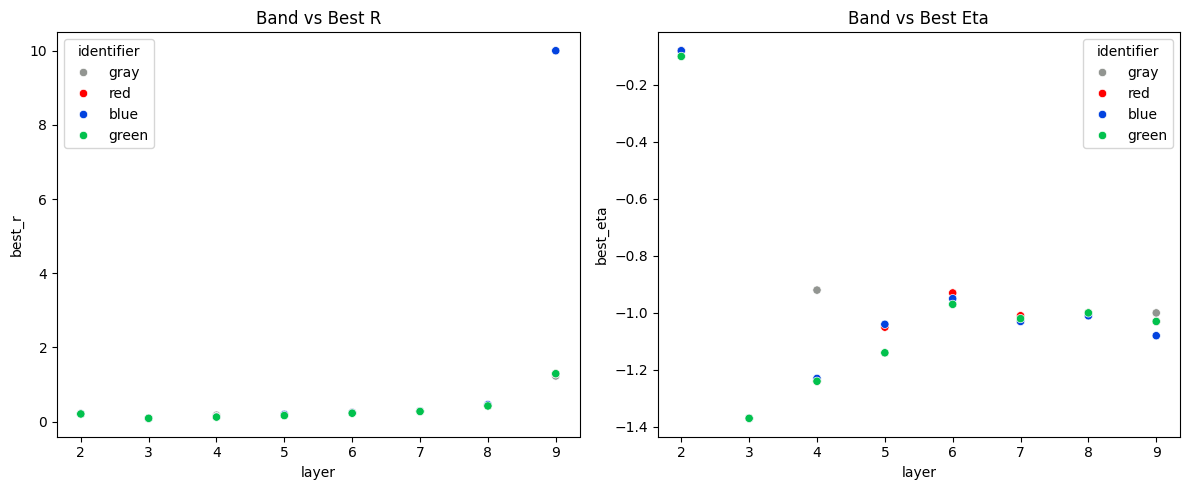

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.scatterplot(data=summary_df, x='layer', y='best_r', hue='identifier', palette=fixed_palette, ax=axes[0])
axes[0].set_title('Band vs Best R')
sns.scatterplot(data=summary_df, x='layer', y='best_eta', hue='identifier', palette=fixed_palette, ax=axes[1])
axes[1].set_title('Band vs Best Eta')
plt.tight_layout()
plt.show()

In [ ]:
sns.scatterplot(data=summary_df, x='layer', y='kstest_stat_best', hue='identifier', palette=fixed_palette)

ValueError: Could not interpret value `layer` for `x`. An entry with this name does not appear in `data`.

<Axes: xlabel='best_r', ylabel='best_eta'>

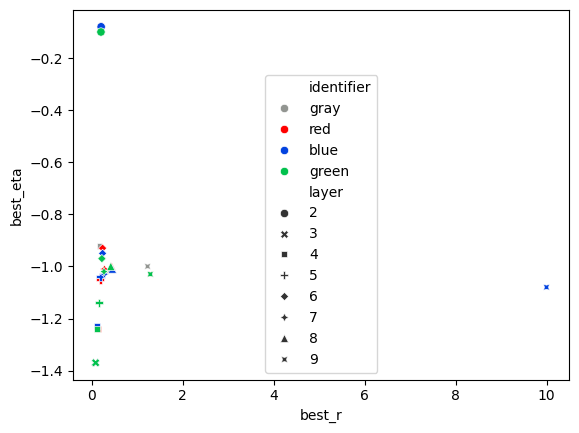

In [ ]:
sns.scatterplot(data=summary_df, x='best_r', y='best_eta', hue='identifier', style='layer', palette=fixed_palette)

In [ ]:
summary_df.columns

Index(['layer', 'obs_var', 'var_lower', 'var_upper', 'obs_kurt', 'kurt_lower',
       'kurt_upper', 'total_samples', 'initial_r', 'initial_eta',
       'kstest_stat_initial', 'kstest_stat_cutoff_0.05', 'kstest_stat_eta0',
       'best_r_eta0', 'best_r', 'best_eta', 'kstest_stat_best', 'iter1_r',
       'iter1_eta', 'kstest_stat_iter1', 'n_pval_0.05', 'param_gaussian',
       'kstest_stat_gaussian', 'kstest_pval_gaussian', 'param_laplace',
       'kstest_stat_laplace', 'kstest_pval_laplace', 'param_t',
       'kstest_stat_t', 'kstest_pval_t', 'kstest_pval_gengamma', 'identifier',
       'size', 'dataset_name', 'transform', 'channel', 'ksstat_discrete'],
      dtype='object')

<Axes: xlabel='layer', ylabel='param_gaussian'>

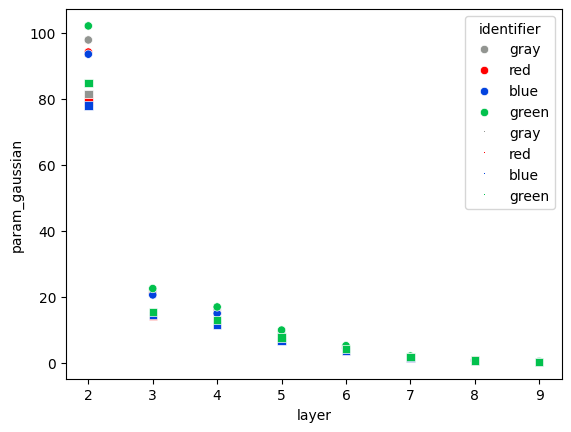

In [ ]:
sns.scatterplot(data=summary_df, x='layer', y='param_gaussian', hue='identifier', palette=fixed_palette, marker = 'o')
sns.scatterplot(data=summary_df, x='layer', y='param_laplace', hue='identifier', palette=fixed_palette, marker = ',')

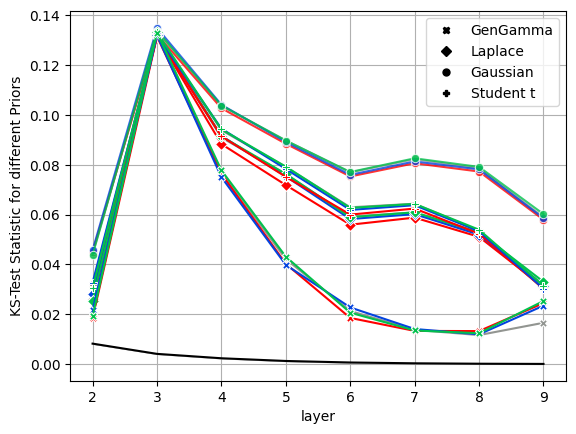

In [ ]:
sns.lineplot(data=summary_df, x='layer', y='kstest_stat_gaussian', hue='identifier', palette=fixed_palette, marker = 'o', alpha=0.8)
sns.lineplot(data=summary_df, x='layer', y='kstest_stat_laplace', hue='identifier', palette=fixed_palette, marker = 'D')
sns.lineplot(data=summary_df, x='layer', y='kstest_stat_t', hue='identifier', palette=fixed_palette, marker = 'P')
sns.lineplot(data=summary_df, x='layer', y='kstest_stat_best', hue='identifier', palette=fixed_palette, marker = 'X')
sns.lineplot(data=summary_df, x='layer', y='kstest_stat_cutoff_0.05', c = 'black')
plt.ylabel("KS-Test Statistic for different Priors")
plt.legend(points, labels)
plt.grid(True)

In [ ]:
summary_df.filter(regex = 'param.*|identifier')

,param_gaussian,param_laplace,param_t,identifier
0,97.783800,81.396700,68.279900,gray
1,21.694100,14.961000,12.082400,gray
2,16.048900,12.441900,10.038900,gray
3,9.329520,7.243720,5.830180,gray
4,4.952390,3.968450,3.208150,gray
5,2.014320,1.660870,1.319320,gray
6,0.853965,0.739293,0.580553,gray
7,0.433595,0.381958,0.304260,gray
8,94.125800,78.991400,65.979900,red
9,20.946400,14.361200,11.459600,red
